<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/IBMEC7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Naive Bayes**

In [20]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB

treino = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/JogarVolei%20-%20nb.csv')
treino



,previsao,temperatura,umidade,vento,jogar
0,1,1,1,0,0
1,1,1,1,1,0
2,0,1,1,0,1
3,2,0,1,0,1
4,2,2,0,0,1
5,2,2,0,1,0
6,0,2,0,1,1
7,1,0,1,0,0
8,1,2,0,0,1
9,2,0,0,0,1


In [21]:
nb = MultinomialNB()
nb.fit(treino[['previsao','temperatura','umidade','vento']] , treino['jogar'])
acuracia_treino = nb.score(treino[['previsao','temperatura','umidade','vento']] , treino['jogar'])
acuracia_treino

0.7142857142857143

In [22]:
nublado_tempA_umidA_semvento = pd.DataFrame({
    'previsao':[0],
    'temperatura':[1],
    'umidade':[1],
    'vento':[0]
}) 

nb.predict(nublado_tempA_umidA_semvento)

array([1])

In [23]:
teste = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/JogarVolei%20-%20test.csv')
teste

,previsao,temperatura,umidade,vento
0,0,1,1,0
1,1,1,1,1
2,0,1,1,0
3,2,0,1,0
4,2,2,0,0
5,2,2,0,1
6,0,2,0,1
7,0,0,1,0
8,0,2,0,0
9,2,0,1,1


In [24]:
import numpy as np
y_teste = np.array([0,0,1,1,1,0,1,0,1,0])
y_teste


array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [25]:

prev_teste=nb.predict(teste)
prev_teste


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [26]:
prev_teste == y_teste

array([False, False,  True,  True,  True, False,  True, False,  True,
        True])

In [27]:

from sklearn.metrics import accuracy_score
acuracia_teste = accuracy_score(y_teste,prev_teste)
acuracia_teste 

0.6

[[1 4]
 [0 5]]


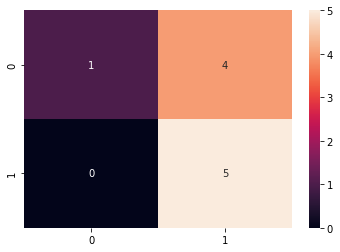

In [28]:

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)



In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_teste , prev_teste))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.56      1.00      0.71         5

    accuracy                           0.60        10
   macro avg       0.78      0.60      0.52        10
weighted avg       0.78      0.60      0.52        10



**Exercicio Bayes**

In [30]:
treino = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20okk.csv')
treino.head()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [31]:
nb= MultinomialNB()
nb.fit( treino[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']] , treino['Inadimplente'] )

teste = pd.read_csv('https://raw.githubusercontent.com/lcbjuk/ML/master/dados/RiscoCredito%20-%20prever2.csv')
teste

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.40
1,0,2,7,9,2.60
2,0,1,7,9,5.80
3,0,1,7,9,4.70
4,0,1,7,9,3.90
5,0,1,8,9,3.25
6,0,1,8,8,7.20
7,1,2,4,3,1.25


In [32]:
previsoes = nb.predict(teste[['Genero',	'GrauEscolaridade',	'Profissao',	'Renda']])
previsoes

array([1, 0, 0, 0, 0, 0, 0, 1])

In [33]:
matriz = pd.crosstab(teste['Inadimplente'] , previsoes)
matriz

col_0,0,1
Inadimplente,,
0,6,0
1,0,2


In [34]:
acuracia = sum(teste['Inadimplente'] == previsoes) / len(teste)
acuracia

1.0